In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
edj_df = pd.read_html('results_ejudge.html', index_col='User')[0]
edj_df

,Place,A,B,C,D,E,F,G,H,Solved,Score
User,,,,,,,,,,,
r0300205,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
r0300206,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
r0300508,3,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139
r0300314,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
r0300209,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
...,...,...,...,...,...,...,...,...,...,...,...
r0300806,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
r0300812,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
s1393305,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [3]:
edj_df.index.to_series().isna().value_counts()

False    129
Name: User, dtype: int64

In [4]:
gr_df = pd.read_excel('students_info.xlsx', index_col='login')
gr_df

,group_faculty,group_out
login,,
r0300101,1,35
r0300102,1,32
r0300103,1,32
r0300104,1,32
r0300105,1,32
...,...,...
NaN,8,38
NaN,8,38
NaN,8,38


In [5]:
gr_df.group_out.value_counts()

32    20
36    19
35    18
34    17
38    16
33    16
31    10
Name: group_out, dtype: int64

In [6]:
gr_df[:]

,group_faculty,group_out
login,,
r0300101,1,35
r0300102,1,32
r0300103,1,32
r0300104,1,32
r0300105,1,32
...,...,...
NaN,8,38
NaN,8,38
NaN,8,38


In [7]:
edj_df.loc['r0300205',:]

Place       1
A           9
B          10
C          19
D          20
E          20
F          30
G          30
H          49
Solved      8
Score     187
Name: r0300205, dtype: object

In [8]:
gr_df.index.to_series().isna().value_counts()

False    110
True       6
Name: login, dtype: int64

In [9]:
gr_df.index.dropna().value_counts()

r0300514    1
r0300512    1
r0300515    1
r0300205    1
r0300619    1
           ..
r0300216    1
r0300505    1
r0300801    1
r0300107    1
r0300501    1
Name: login, Length: 110, dtype: int64

В табличке с группами есть `NaN`-ы. Для 6 человек не указаны логины

In [10]:
gr_df = gr_df[~gr_df.index.isna()]
gr_df.index.to_series().isna().value_counts()

False    110
Name: login, dtype: int64

In [11]:
gr_df

,group_faculty,group_out
login,,
r0300101,1,35
r0300102,1,32
r0300103,1,32
r0300104,1,32
r0300105,1,32
...,...,...
r0300807,8,38
r0300808,8,38
r0300809,8,38


In [12]:
ind_gr = gr_df.index
ind_edj = edj_df.index
ind_gr.union(ind_edj).difference(ind_gr.intersection(ind_edj))

Index(['r0300117', 'r0300118', 'r0300120', 'r0300217', 'r0300218', 'r0300317',
       'r0300318', 'r0300408', 'r0300416', 'r0300417', 'r0300418', 'r0300519',
       'r0300520', 'r0300606', 'r0300620', 'r0300812', 's1393305', 's1393410',
       'user594'],
      dtype='object')

Есть логины, которые присутствуют в одной таблице, но отсутствуют в другой

In [13]:
df = edj_df.join(gr_df, how='inner')
df

,Place,A,B,C,D,E,F,G,H,Solved,Score,group_faculty,group_out
r0300205,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187,2,33
r0300206,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182,2,33
r0300508,3,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139,5,33
r0300314,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137,3,33
r0300209,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
r0300618,75-129,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,34
r0300619,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,36
r0300803,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8,38
r0300805,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8,38


Задача#1


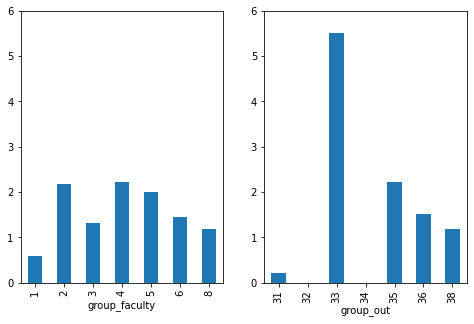

In [14]:
print('Задача#1')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8, 5)
df[['Solved', 'group_faculty']].groupby('group_faculty').mean()['Solved'].plot(kind = 'bar', ax = ax[0])
df[['Solved', 'group_out']].groupby('group_out').mean()['Solved'].plot(kind ='bar', ax = ax[1])
for a in ax:
    a.set_ylim([0, 6])

In [15]:
g_and_h = df[(df['G']//10>0)|(df['H']//10>0)]
g_and_h

,Place,A,B,C,D,E,F,G,H,Solved,Score,group_faculty,group_out
r0300205,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187,2,33
r0300206,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182,2,33
r0300508,3,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139,5,33
r0300314,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137,3,33
r0300209,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132,2,33
r0300202,6,10.0,9.0,20.0,20.0,20.0,30.0,9.0,10.0,6,128,2,33
r0300514,7,10.0,10.0,13.0,18.0,NaN,30.0,NaN,30.0,4,111,5,33
r0300414,12,10.0,6.0,20.0,20.0,NaN,30.0,NaN,15.0,4,101,4,33
r0300511,18,9.0,9.0,NaN,NaN,NaN,30.0,NaN,29.0,3,77,5,35
r0300212,20-21,10.0,3.0,20.0,NaN,20.0,NaN,NaN,20.0,3,73,2,36


In [16]:
print('Задача#2\n\nПрошедшие хотя бы один тест в последних двух задачах пришли из факультетских групп:')
for gr in g_and_h['group_faculty'].drop_duplicates().sort_values().values:
    print('\t'+str(gr))
print('И попали в группы по информатике:')
for gr in g_and_h['group_out'].drop_duplicates().sort_values().values:
    print('\t'+str(gr))


Задача#2

Прошедшие хотя бы один тест в последних двух задачах пришли из факультетских групп:
	2
	3
	4
	5
И попали в группы по информатике:
	33
	35
	36
